In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dependencies and Setup
import pandas as pd
import numpy as np
import time

# import datetime for set the day the data was requested
import datetime

# CSV files of crime data by year plus list of CPS schools
cps_schools = "schools.csv"
crime_data_a = "2018_crimes_with_dist.csv"
crime_data_b = "2016_crimes_with_dist.csv"
crime_data_c = "2014_crimes_with_dist.csv"
crime_data_d = "2012_crimes_with_dist.csv"
crime_data_e = "2010_crimes_with_dist.csv"
crime_data_f = "2008_crimes_with_dist.csv"

# Read in all CSV files
cps_schools_df = pd.read_csv(cps_schools)
crime_data_df_a = pd.read_csv(crime_data_a)
crime_data_df_b = pd.read_csv(crime_data_b)
crime_data_df_c = pd.read_csv(crime_data_c)
crime_data_df_d = pd.read_csv(crime_data_d)
crime_data_df_e = pd.read_csv(crime_data_e)
crime_data_df_f = pd.read_csv(crime_data_f)

cps_schools_df
crime_data_df_a.columns
cps_schools_df.columns

Index(['school_id', 'short_name', 'governance', 'address', 'commarea', 'zip',
       'lat', 'long', 'grade_cat', 'grades'],
      dtype='object')

In [3]:
# Rename nearest_school_index column in crime data dataframes
crime_data_df_a = crime_data_df_a.rename(columns={"nearest_school_index":"school_id"})
crime_data_df_b = crime_data_df_b.rename(columns={"nearest_school_index":"school_id"})
crime_data_df_c = crime_data_df_c.rename(columns={"nearest_school_index":"school_id"})
crime_data_df_d = crime_data_df_d.rename(columns={"nearest_school_index":"school_id"})
crime_data_df_e = crime_data_df_e.rename(columns={"nearest_school_index":"school_id"})
crime_data_df_f = crime_data_df_f.rename(columns={"nearest_school_index":"school_id"})
len(crime_data_df_b)

266448

In [4]:
# Create new dataframes including only crime types needed
crime_data_df_a = crime_data_df_a.loc[crime_data_df_a['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]
crime_data_df_b = crime_data_df_b.loc[crime_data_df_b['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]
crime_data_df_c = crime_data_df_c.loc[crime_data_df_c['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]
crime_data_df_d = crime_data_df_d.loc[crime_data_df_d['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]
crime_data_df_e = crime_data_df_e.loc[crime_data_df_e['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]
crime_data_df_f = crime_data_df_f.loc[crime_data_df_f['primary_type'].isin
                                      (['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]

crime_data_df_f.head()

,case_number,description,primary_type,fbi_code,latitude,longitude,domestic,arrest,date,time,month,year,day,nearest_school,school_id,nearest_school_dist
235,HP163225,SIMPLE,BATTERY,08B,41.979849,-87.711216,False,False,2/6/2008,05:00.0,2,2008,6,NORTHSIDE PREP HS,609749,0.200567
312,HP103705,OVER $500,THEFT,6,42.014000,-87.810268,False,False,1/2/2008,00:00.0,1,2008,2,OMBUDSMAN - NORTHWEST HS,610569,0.330380
313,HP100497,SIMPLE,BATTERY,08B,41.798410,-87.749414,False,False,1/1/2008,30:00.0,1,2008,1,GLOBAL CITIZENSHIP,400009,0.902164
315,HP102689,SIMPLE,BATTERY,08B,41.809287,-87.596827,False,True,1/2/2008,20:00.0,1,2008,2,LITTLE BLACK PEARL HS,400137,0.175698
322,HP110767,FROM BUILDING,THEFT,6,41.760009,-87.568824,False,False,1/7/2008,30:00.0,1,2008,7,SOUTH SHORE INTL HS,610547,0.526357


In [5]:
data_df_a_new = crime_data_df_a[['primary_type', 'year', 'school_id']]
data_df_b_new = crime_data_df_b[['primary_type', 'year', 'school_id']]
data_df_c_new = crime_data_df_c[['primary_type', 'year', 'school_id']]
data_df_d_new = crime_data_df_d[['primary_type', 'year', 'school_id']]
data_df_e_new = crime_data_df_e[['primary_type', 'year', 'school_id']]
data_df_f_new = crime_data_df_f[['primary_type', 'year', 'school_id']]
data_df_f_new.head()

,primary_type,year,school_id
235,BATTERY,2008,609749
312,THEFT,2008,610569
313,BATTERY,2008,400009
315,BATTERY,2008,400137
322,THEFT,2008,610547


In [6]:
# Merge all crime files into one
all_crime_data = data_df_a_new
all_crime_data = all_crime_data.append(data_df_b_new)
all_crime_data = all_crime_data.append(data_df_c_new)
all_crime_data = all_crime_data.append(data_df_d_new)
all_crime_data = all_crime_data.append(data_df_e_new)
all_crime_data = all_crime_data.append(data_df_f_new)
len(all_crime_data)

1189243

In [7]:
# Create smaller dataframe for school information
school_cats = cps_schools_df[['school_id', 'grade_cat']]

In [8]:
# Merge school data with combined crime data 
merged_data_df = pd.merge(all_crime_data, school_cats, how='left', on='school_id')
len(merged_data_df)
merged_data_df.columns


Index(['primary_type', 'year', 'school_id', 'grade_cat'], dtype='object')

In [9]:
# Group schools by type

school_year = merged_data_df.groupby(["year", "grade_cat"]).count()["primary_type"]
school_year.head()
#school_type_crime = school_year["grade_cat"].count()
#school_type_crime


year  grade_cat
2008  ES            96001
      HS           166804
2010  ES            84942
      HS           144808
2012  ES            76590
Name: primary_type, dtype: int64

In [10]:
#Reset index
school_year = school_year.reset_index()

In [26]:
# Create crime counts for Elementary and High Schools
es_count = school_year.loc[school_year['grade_cat']=='ES']

hs_count = school_year.loc[school_year['grade_cat']=='HS']

es_count

,year,grade_cat,primary_type
0,2008,ES,96001
2,2010,ES,84942
4,2012,ES,76590
6,2014,ES,62335
8,2016,ES,58925
10,2018,ES,57263


In [37]:
#Group school crime by type

es_crime = es_count['primary_type']
hs_crime = hs_count['primary_type']


<IPython.core.display.Javascript object>


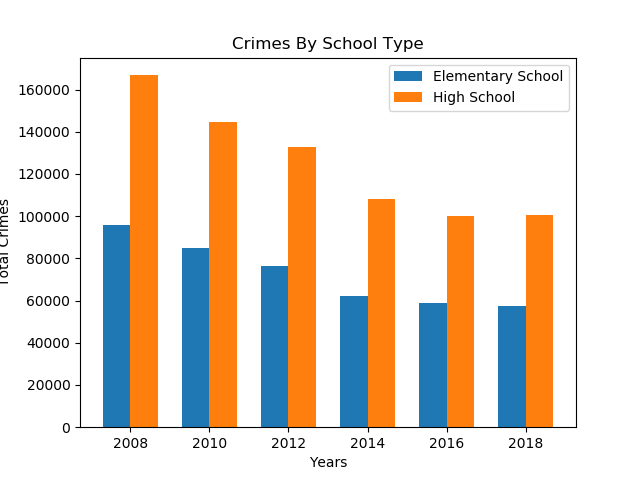

In [41]:
# Plot data
N = 6

ind = np.arange(N) 
width = 0.35 
plt.bar(ind, es_crime, width, label = 'Elementary School')
plt.bar(ind + width, hs_crime, width,
    label='High School')

plt.xlabel('Years')
plt.ylabel('Total Crimes')
plt.title('Crimes By School Type')

plt.xticks(ind + width / 2, ('2008', '2010', '2012', '2014', '2016', '2018'))
plt.legend(loc='best')
plt.savefig("Crime By School Type")
plt.show()